# Customer Sales Analysis 

## Objective
The objective of this project is to analyze customer purchase data from an e-commerce platform to identify sales trends, top customers, product performance, and revenue drivers. The analysis focuses on generating actionable business insights using data cleaning, exploratory data analysis, and visualization techniques.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
pd.set_option("display.max_columns", None)


In [9]:
df = pd.read_csv("data/online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Dataset shape
df.shape

(541909, 8)

In [12]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# Check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleaning and Preprocessing

The dataset contains missing customer identifiers, incomplete product descriptions, and potential invalid transactions such as returns. These issues are addressed to ensure accurate and reliable analysis.


In [14]:
# Create a clean copy
df_clean = df.copy()

# Drop rows with missing CustomerID
df_clean = df_clean.dropna(subset=["CustomerID"])

# Drop rows with missing product descriptions
df_clean = df_clean.dropna(subset=["Description"])

# Remove returns or invalid transactions
df_clean = df_clean[df_clean["Quantity"] > 0]
df_clean = df_clean[df_clean["UnitPrice"] > 0]

# Convert InvoiceDate to datetime
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

# Check cleaned dataset shape
df_clean.shape


(397884, 8)

In [15]:
# Create Revenue column
df_clean["Revenue"] = df_clean["Quantity"] * df_clean["UnitPrice"]

# Extract date-based features
df_clean["Year"] = df_clean["InvoiceDate"].dt.year
df_clean["Month"] = df_clean["InvoiceDate"].dt.month
df_clean["Day"] = df_clean["InvoiceDate"].dt.day

df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [16]:
df_clean.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Revenue        0
Year           0
Month          0
Day            0
dtype: int64

## Exploratory Data Analysis (EDA)

This section explores overall sales trends, revenue distribution across countries, and customer purchasing behavior to identify key patterns and insights.


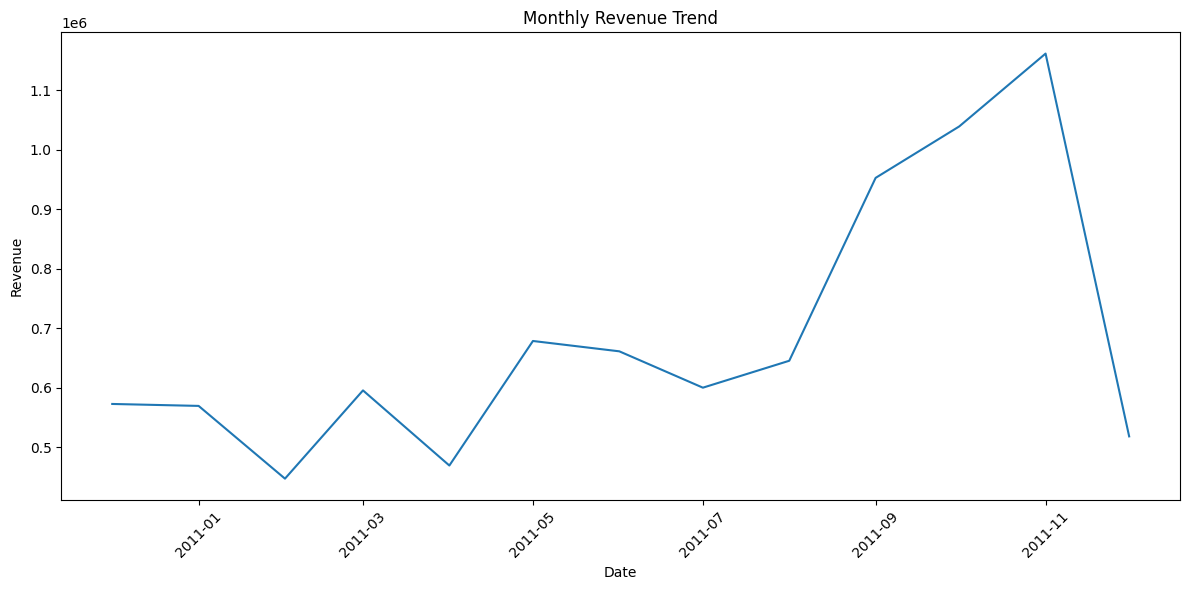

In [17]:
# Monthly revenue trend
monthly_revenue = (
    df_clean
    .groupby(["Year", "Month"])["Revenue"]
    .sum()
    .reset_index()
)

monthly_revenue["Date"] = pd.to_datetime(
    monthly_revenue["Year"].astype(str) + "-" + monthly_revenue["Month"].astype(str)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue["Date"], monthly_revenue["Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


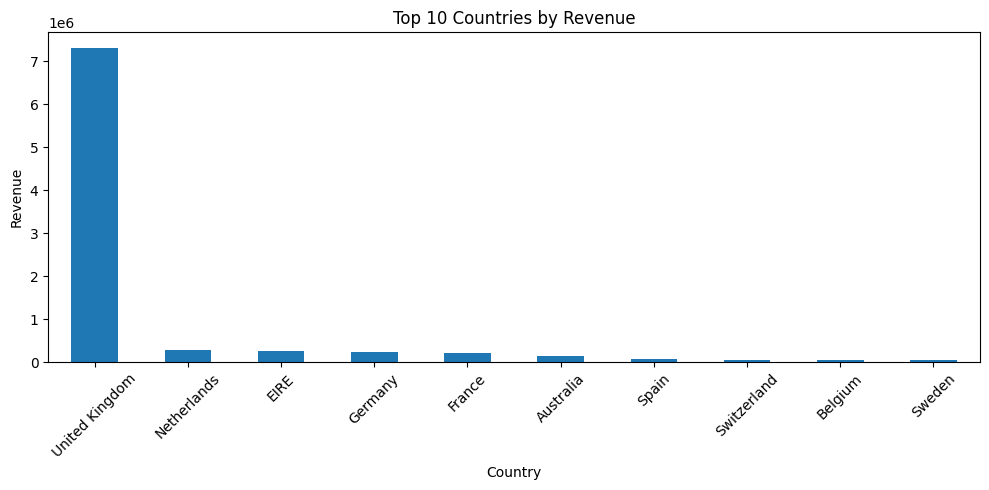

In [18]:
# Top 10 countries by revenue
top_countries = (
    df_clean
    .groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Customer-Level Analysis

This section analyzes customer purchasing behavior to identify high-value customers and understand revenue contribution patterns.


In [19]:
# Top 10 customers by total revenue
top_customers = (
    df_clean
    .groupby("CustomerID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

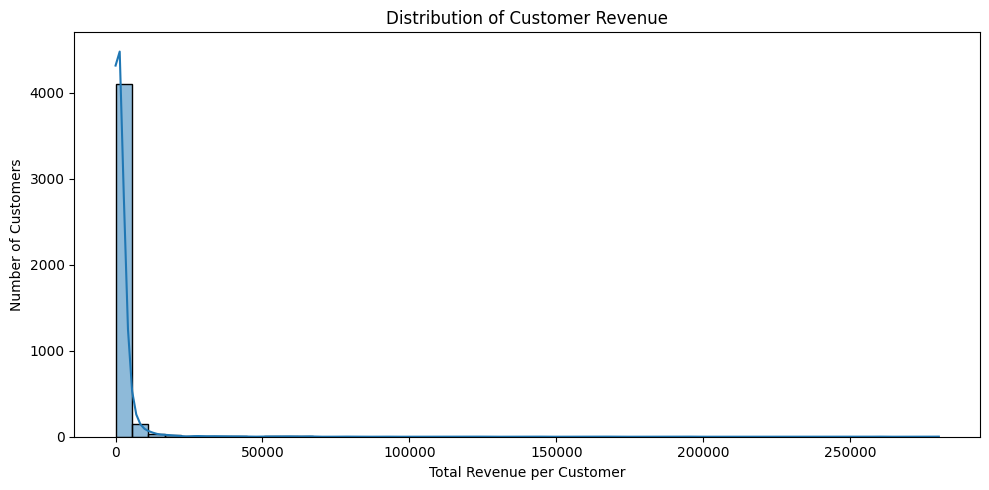

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df_clean.groupby("CustomerID")["Revenue"].sum(),
    bins=50,
    kde=True
)
plt.title("Distribution of Customer Revenue")
plt.xlabel("Total Revenue per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


## Product and Revenue Analysis

This section evaluates product performance by analyzing top-selling items based on revenue and quantity sold.


In [21]:
# Top 10 products by revenue
top_products_revenue = (
    df_clean
    .groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_revenue


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

In [22]:
# Top 10 products by quantity sold
top_products_quantity = (
    df_clean
    .groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products_quantity


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

## Key Business Insights

- Revenue shows strong seasonal growth with peak sales occurring in the final quarter of the year.
- The United Kingdom is the primary revenue contributor, indicating high market concentration.
- A small segment of customers contributes a disproportionately large share of total revenue, confirming a Pareto (80/20) pattern.
- Certain products generate high revenue through premium pricing, while others contribute through high sales volume.
- Identifying high-value customers and top-performing products can support targeted marketing and inventory optimization strategies.


## Conclusion

This analysis examined customer purchase behavior and sales performance using e-commerce transaction data. Through data cleaning, exploratory analysis, and customer and product-level evaluation, meaningful patterns were identified across revenue trends, geographic distribution, and purchasing behavior.

The findings highlight opportunities for revenue growth through customer segmentation, targeted promotions for high-value customers, and strategic focus on top-performing products. This project demonstrates the practical application of data analytics techniques to support business decision-making.
